# SMOTE for Data Augmentation

SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling technique used to address class imbalance in datasets. It generates synthetic samples for the minority class by interpolating between existing data points, improving the model's ability to learn from underrepresented classes and reducing bias towards the majority class.

In [ ]:
!pip install imbalanced-learn

In [ ]:
!pip install scipy==1.11.4
!pip install table-evaluator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 39.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.6/821.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 21.

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from table_evaluator import TableEvaluator

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/CleanedDataset/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/CleanedDataset/y_train.csv')

## Class Distribution Before Data Augmentation

In [ ]:
class_counts = Counter(y_train['Reason of Failure'])

In [ ]:
class_counts

Counter({0: 6747, 6: 32, 3: 90, 2: 62, 4: 56, 5: 11, 1: 2})

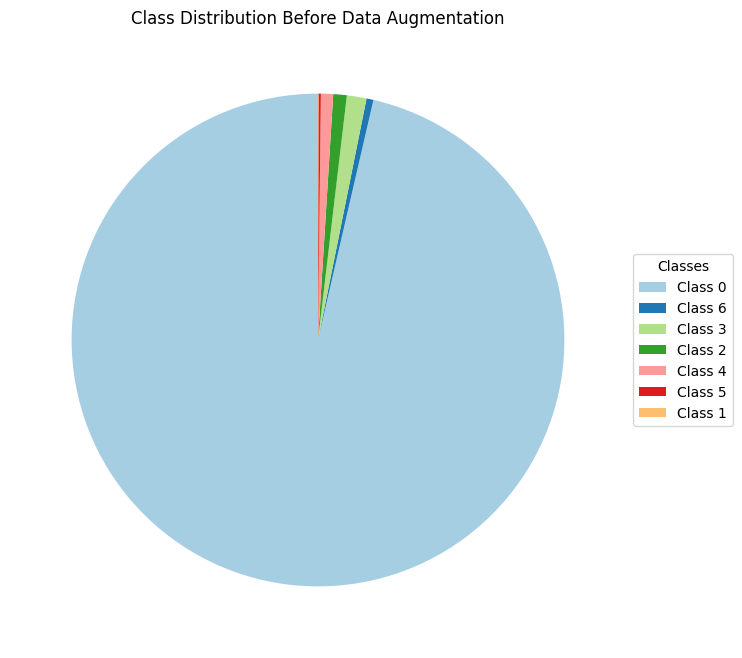

In [ ]:
labels = [f"Class {cls}" for cls in class_counts.keys()]
sizes = class_counts.values()

plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(sizes, labels=None, startangle=90, colors=plt.cm.Paired.colors)
plt.legend(wedges, labels, title="Classes", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Class Distribution Before Data Augmentation")
plt.show()

## Applying SMOTE

In [ ]:
smote = SMOTE(random_state=42, k_neighbors=183)

In [ ]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
X_resampled.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,-1.402354,-1.216963,0.776593,-1.192455,0.393537
1,2,-0.352437,-0.542955,-1.142245,0.633308,-1.208953
2,2,0.247515,1.344270,-1.538284,2.087899,0.597776
3,1,-0.852397,-1.149563,-0.528663,0.382516,1.069096
4,1,1.947381,1.950878,-0.071265,0.252105,1.351888


In [ ]:
y_resampled.head()

,Reason of Failure
0,0
1,0
2,0
3,0
4,0


## Class Distribution After Data Augmentation

In [ ]:
class_counts_after_smote = Counter(y_resampled['Reason of Failure'])
class_counts_after_smote

Counter({0: 6747, 6: 6747, 3: 6747, 2: 6747, 4: 6747, 5: 6747, 1: 6747})

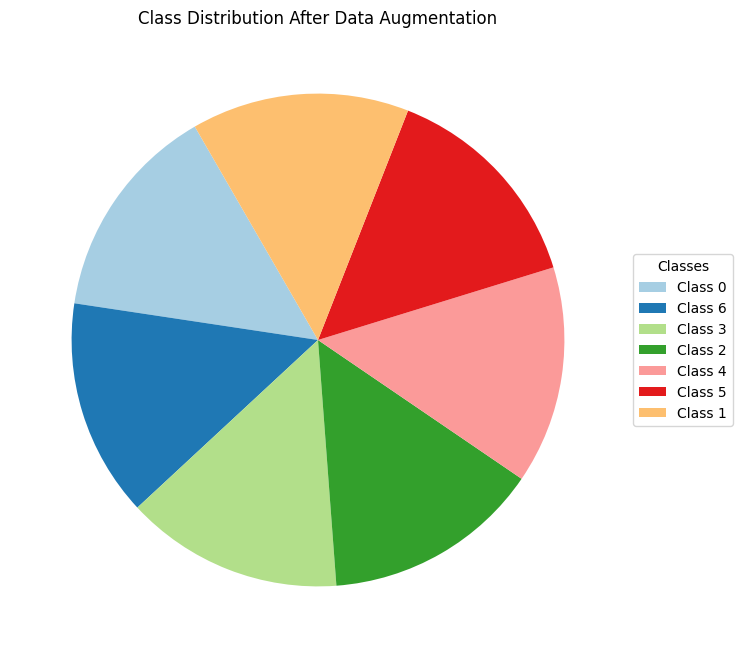

In [ ]:
labels = [f"Class {cls}" for cls in class_counts.keys()]
sizes = class_counts_after_smote.values()

plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(sizes, labels=None, startangle=120, colors=plt.cm.Paired.colors)
plt.legend(wedges, labels, title="Classes", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Class Distribution After Data Augmentation")
plt.show()

## Evaluation of Synthetic Data against Real Data

In [ ]:
X_resampled_subset = X_resampled.sample(n=7000, random_state=42)
y_resampled_subset = y_resampled.loc[X_resampled_subset.index]

In [ ]:
original_data = pd.concat([X_train, y_train], axis=1)
synthetic_data = pd.concat([X_resampled_subset, y_resampled_subset], axis=1)

In [ ]:
table_evaluator = TableEvaluator(original_data, synthetic_data)

In [ ]:
table_evaluator.evaluate(target_col='Reason of Failure')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[                             f1_real  f1_fake  jaccard_similarity
index                                                            
LogisticRegression_real       0.9800   0.6264              0.4418
LogisticRegression_fake       0.3643   0.9029              0.2079
RandomForestClassifier_real   0.9764   0.9379              0.8568
RandomForestClassifier_fake   0.5436   0.9921              0.3672
DecisionTreeClassifier_real   0.9750   0.9236              0.8361
DecisionTreeClassifier_fake   0.5886   0.9786              0.4035
MLPClassifier_real            0.9793   0.9157              0.8531
MLPClassifier_fake            0.7357   0.9907              0.5722]

Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.5886   0.9786              0.4035
DecisionTreeClassifier_real   0.9750   0.9236              0.8361
LogisticRegression_

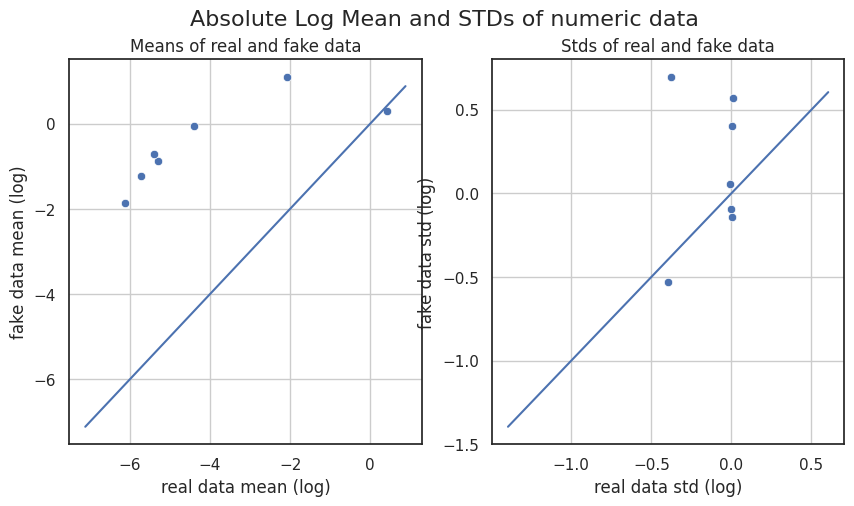

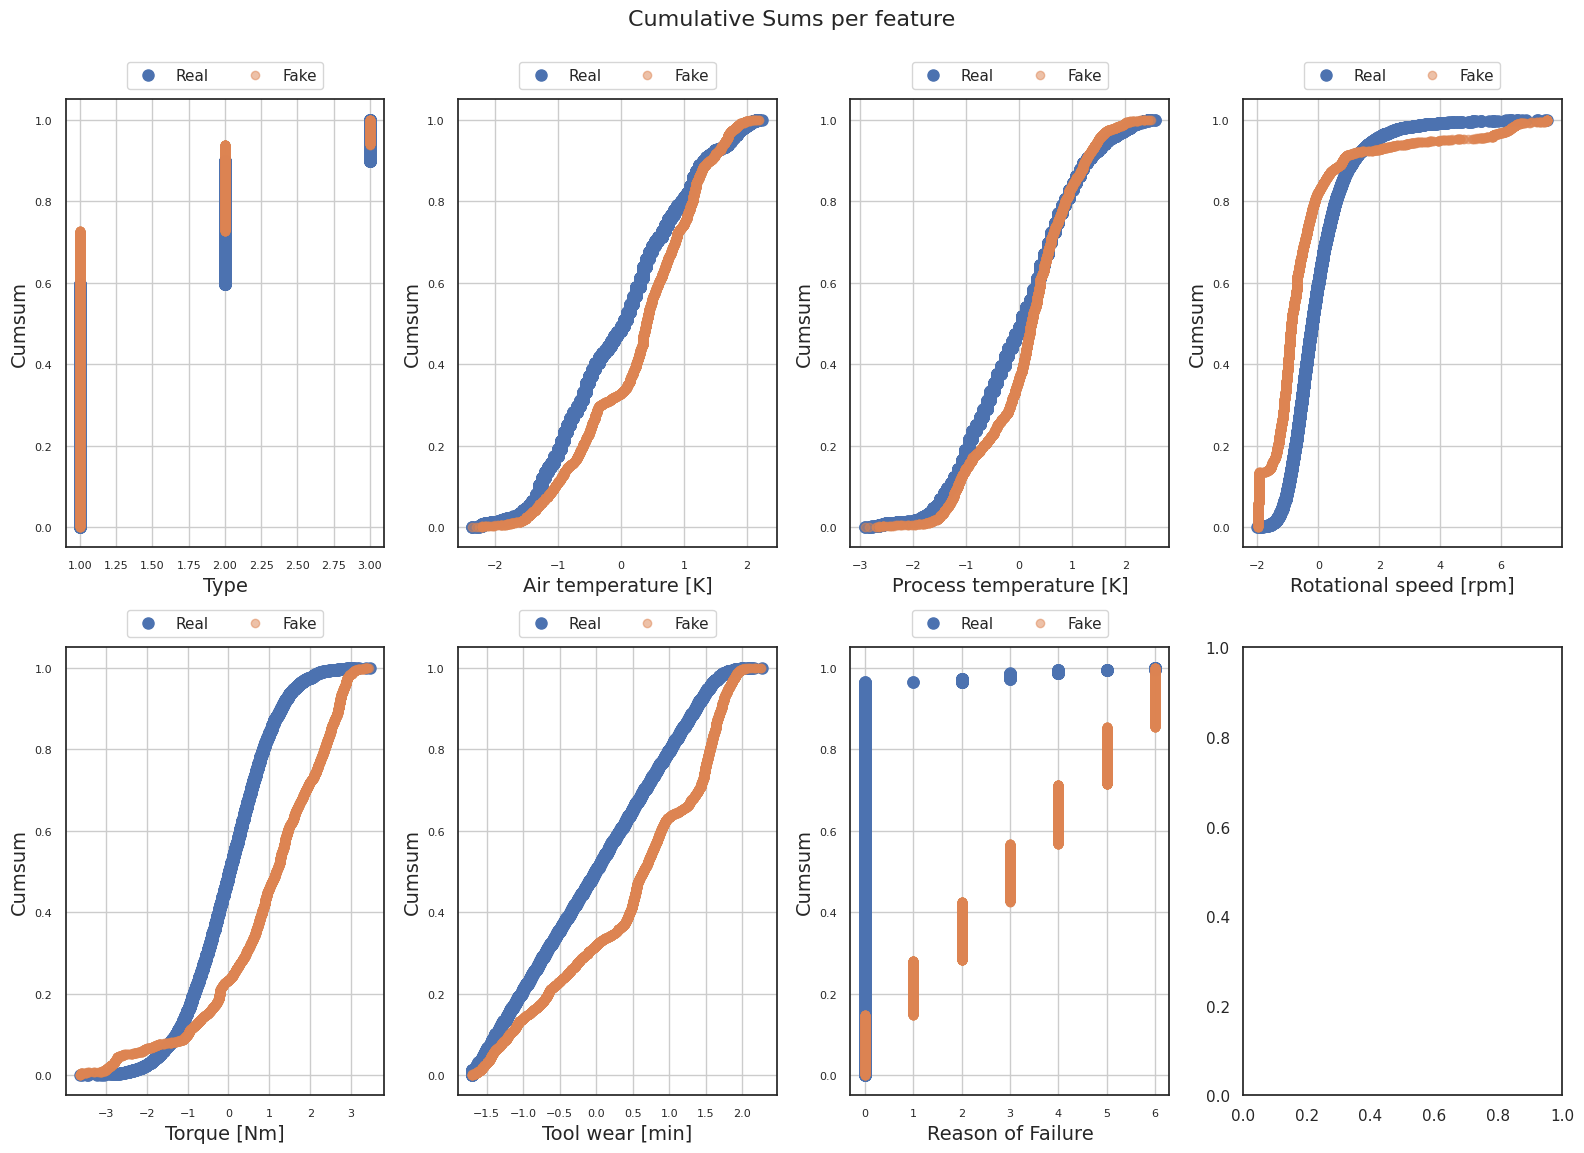

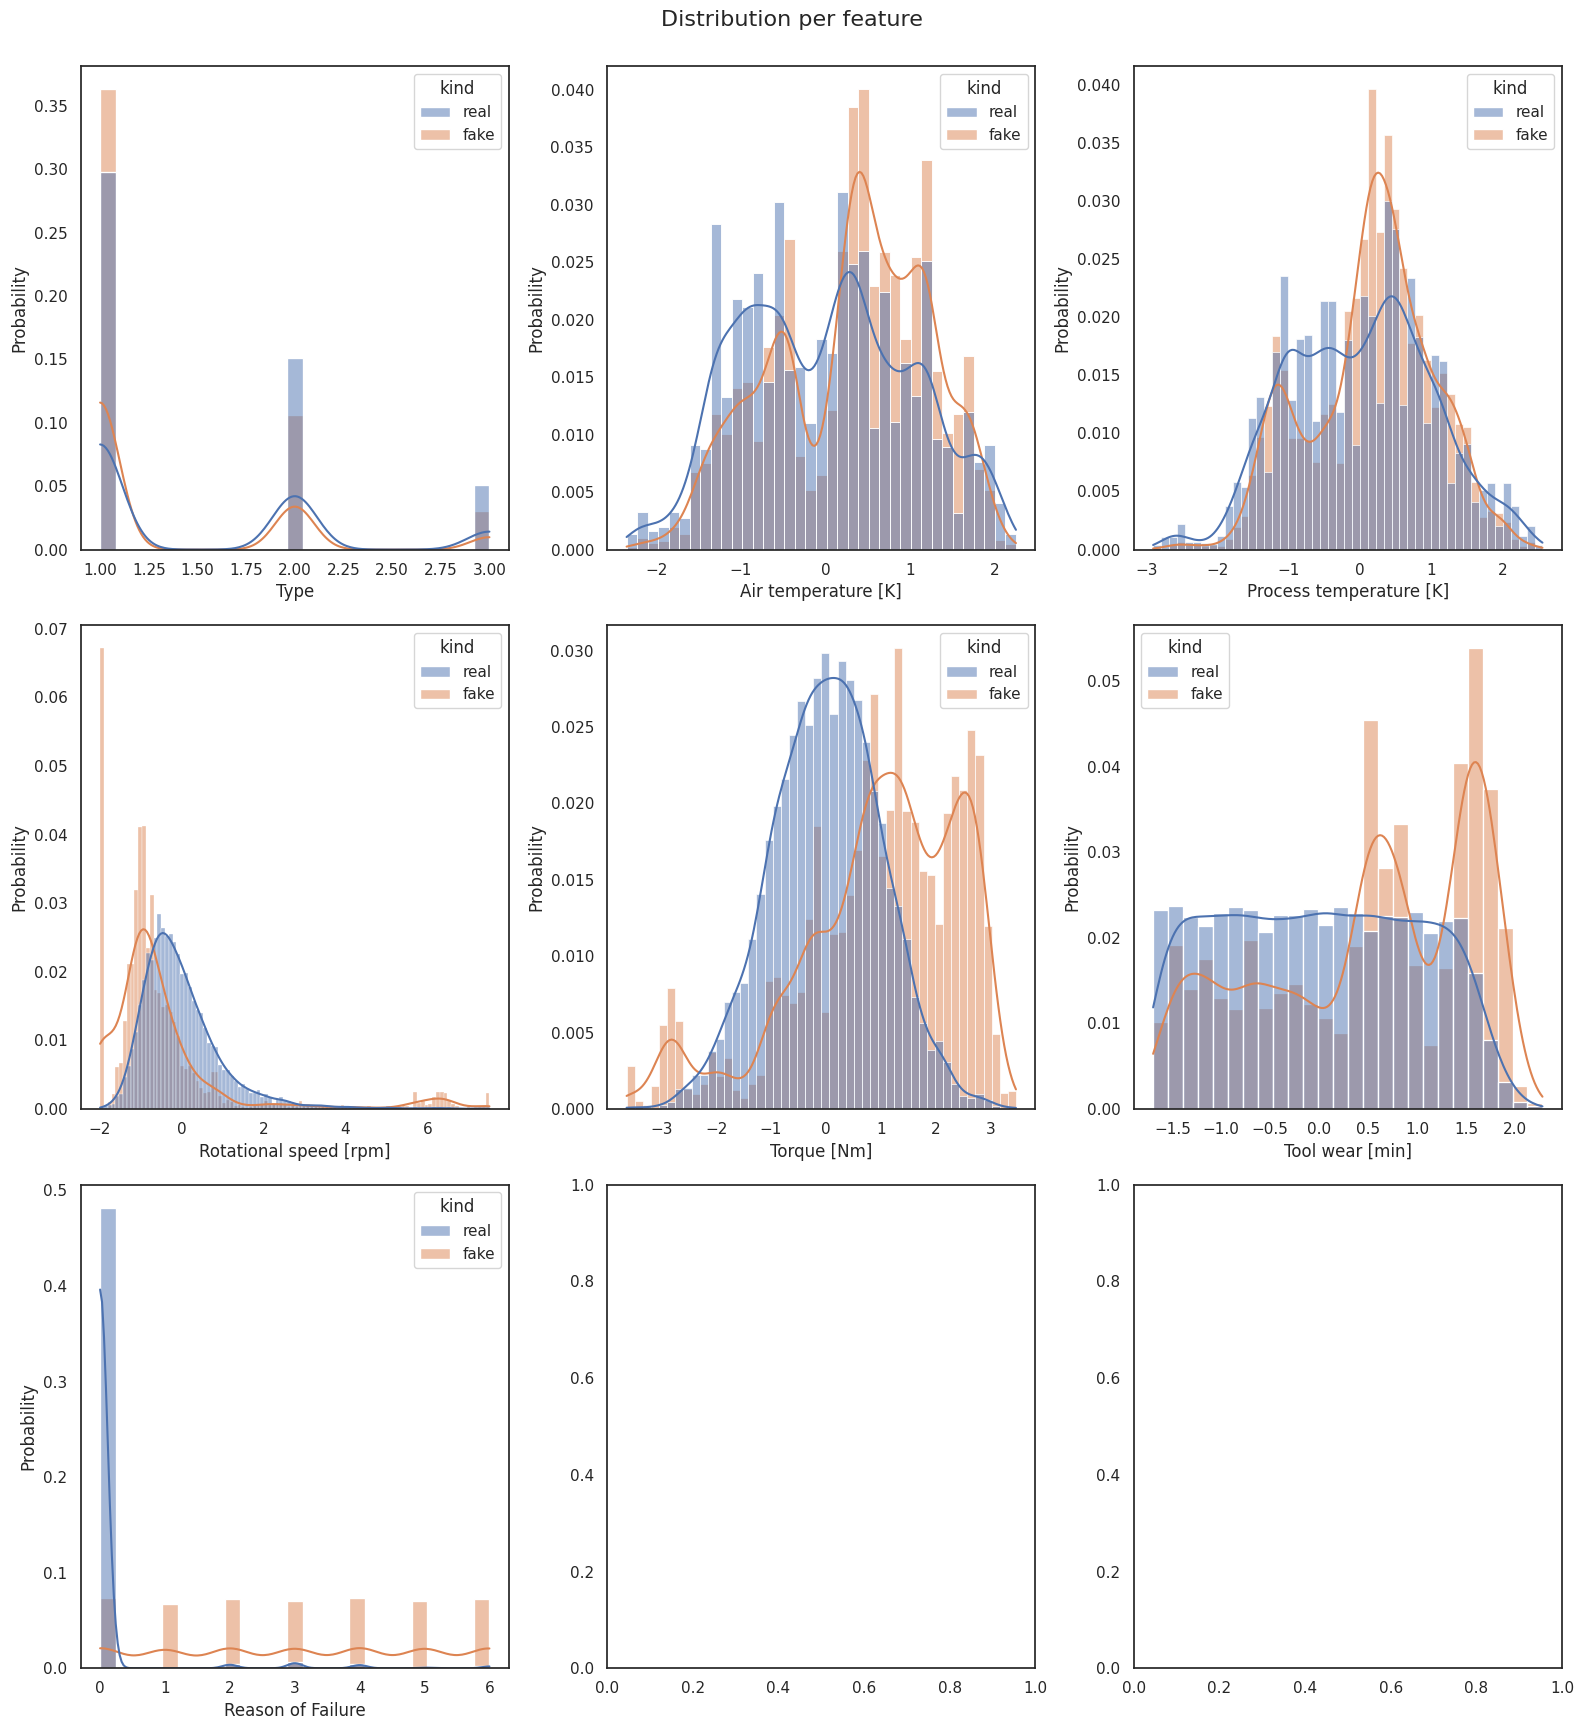

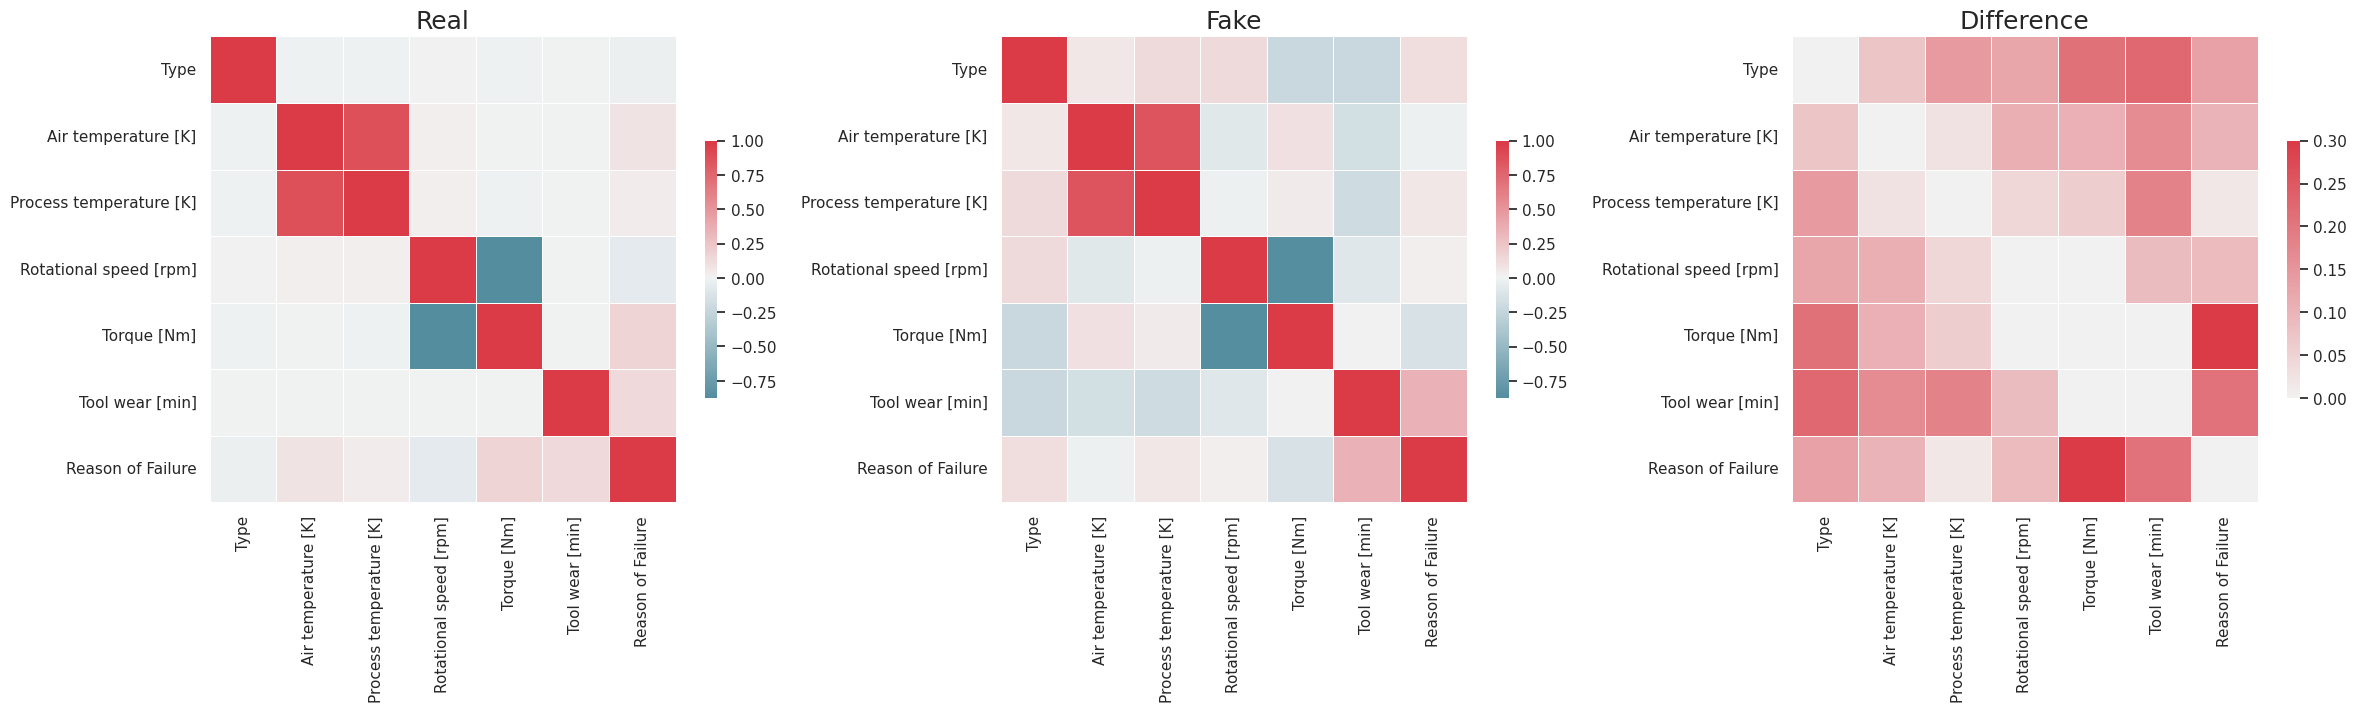

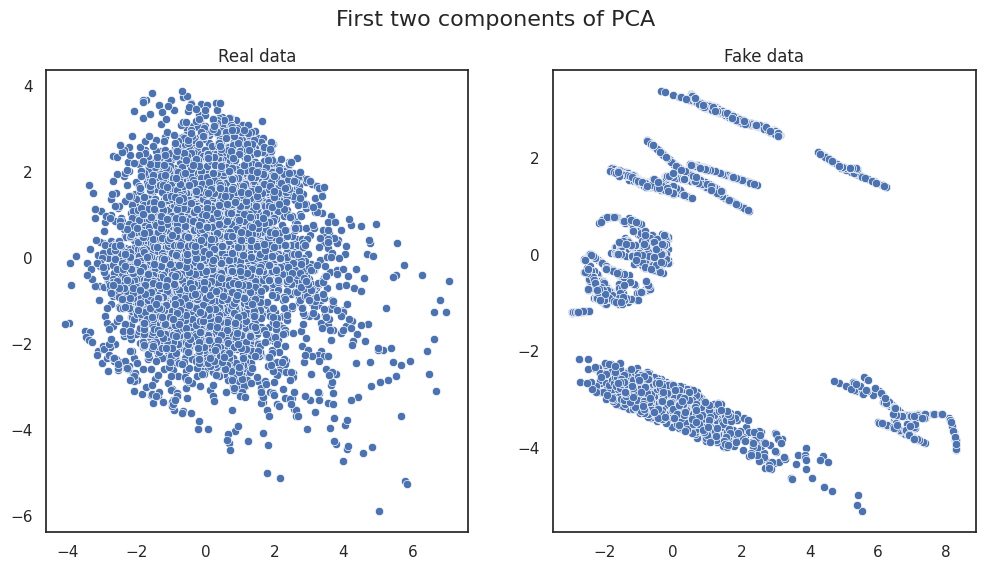

In [ ]:
table_evaluator.visual_evaluation()

## Saving CSV files

In [ ]:
X_resampled.to_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/SMOTE_AugmentedDataset/X_train_smote.csv', index = False)
y_resampled.to_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/SMOTE_AugmentedDataset/y_train_smote.csv', index = False)